# INSTAGRAM FAKE ID DETECTION MODEL SELECTION:

In [1]:
#Basic linbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the train dataset
train=pd.read_csv('train.csv')

In [3]:
#loading the test dataset
test=pd.read_csv('test.csv')

In [4]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [6]:
#shape of train dataset
train.shape

(576, 12)

In [7]:
#shape of test dataset 
test.shape

(120, 12)

Text(0, 0.5, 'No of Instagram accounts')

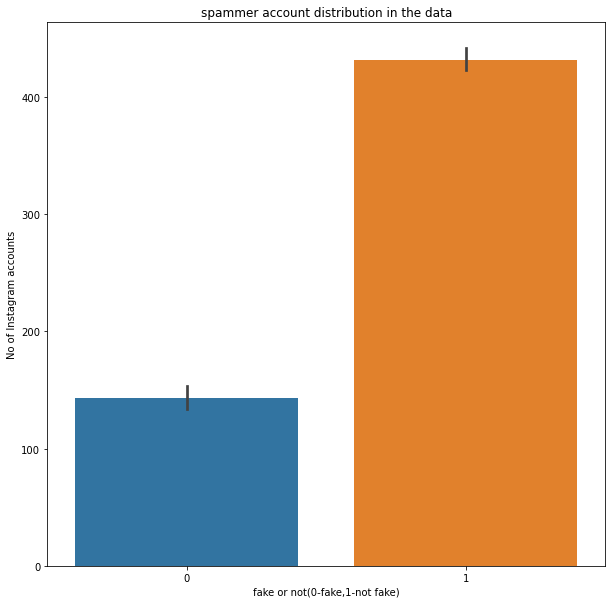

In [8]:
#Bar graph representing the fake accounts of train dataset
plt.figure(figsize=(10,10))
plt.title("spammer account distribution in the data")
sns.barplot(x = train['fake'],y = train.index)
plt.xlabel("fake or not(0-fake,1-not fake)")
plt.ylabel("No of Instagram accounts")

Text(0, 0.5, 'No of Instagram accounts')

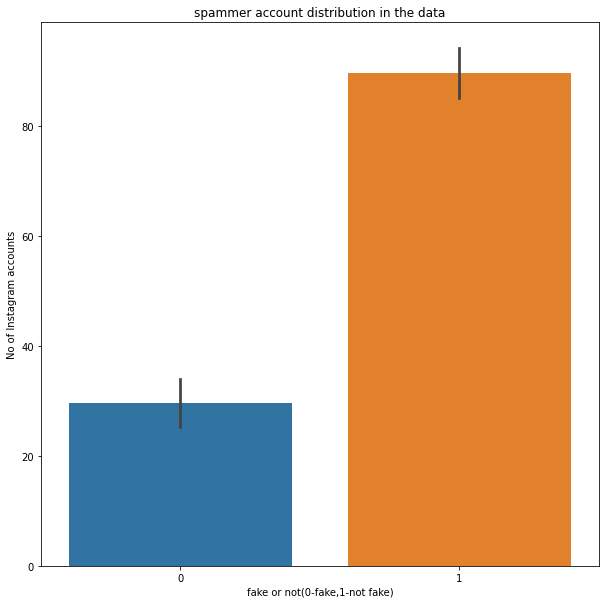

In [9]:
##Bar graph representing the fake accounts of test dataset
plt.figure(figsize=(10,10))
plt.title("spammer account distribution in the data")
sns.barplot(x = test['fake'],y = test.index)
plt.xlabel("fake or not(0-fake,1-not fake)")
plt.ylabel("No of Instagram accounts")

In [10]:
#concatenation of test and train dataset
data=pd.concat([train, test], axis=0)

In [11]:
#shape of data
data.shape

(696, 12)

In [12]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [13]:
#Data types of featrures in the dataset
data.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object

In [14]:
#Checking the null values in the dataset
data.isna().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [15]:
#Description of dataset
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,6.960000e+02,696.000000,696.00000
mean,0.711207,0.166609,1.475575,0.042170,0.035920,23.412356,0.113506,0.369253,103.244253,7.914991e+04,555.086207,0.50000
std,0.453527,0.218964,1.076622,0.143664,0.186223,38.595721,0.317438,0.482950,378.028168,8.428875e+05,1023.613869,0.50036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+01,61.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,252.000000,0.50000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,77.000000,6.930000e+02,601.750000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


In [16]:
#basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   #posts                696 non-null    int64  
 9   #followers            696 non-null    int64  
 10  #follows              696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 70.7 KB


In [17]:
#columns in dataset
data.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

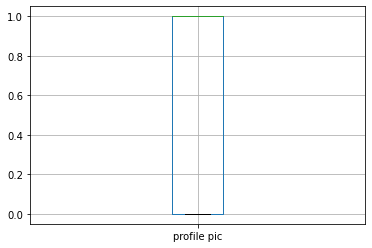

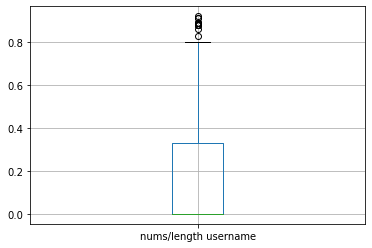

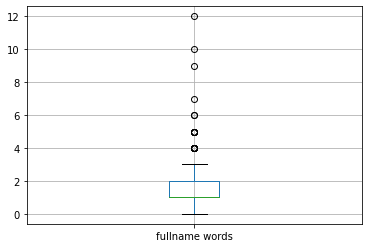

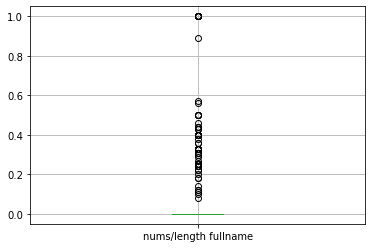

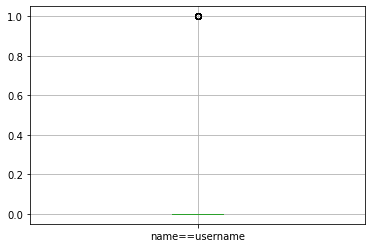

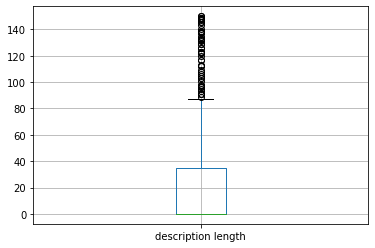

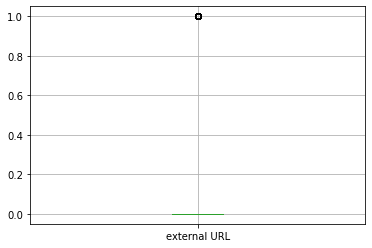

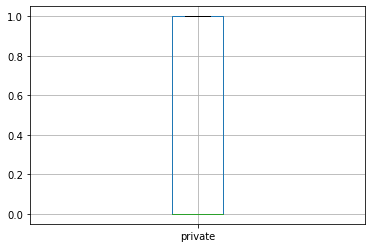

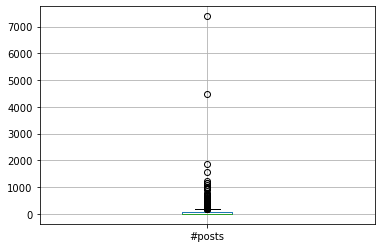

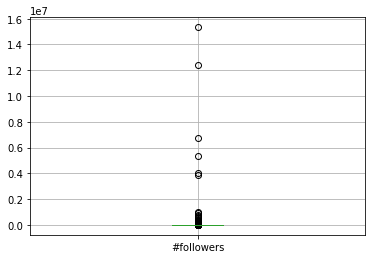

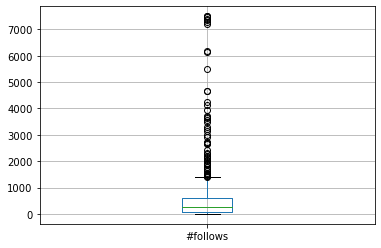

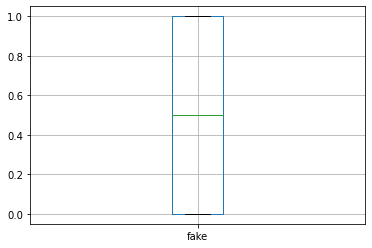

In [18]:
#Checking outliers
for i in data.columns:
    plt.figure()
    data.boxplot([i])
#Since every content is affect the result we cant remove the outliers

Text(0, 0.5, 'No of Instagram accounts')

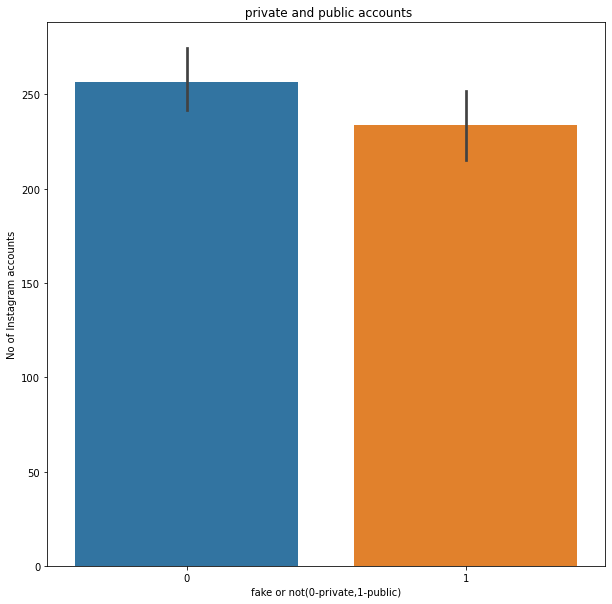

In [19]:
#graph representation of private and public instagram accounts
plt.figure(figsize=(10,10))
plt.title(" private and public accounts")
sns.barplot(x = data['private'],y = data.index)
plt.xlabel("fake or not(0-private,1-public)")
plt.ylabel("No of Instagram accounts")

In [20]:
data.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

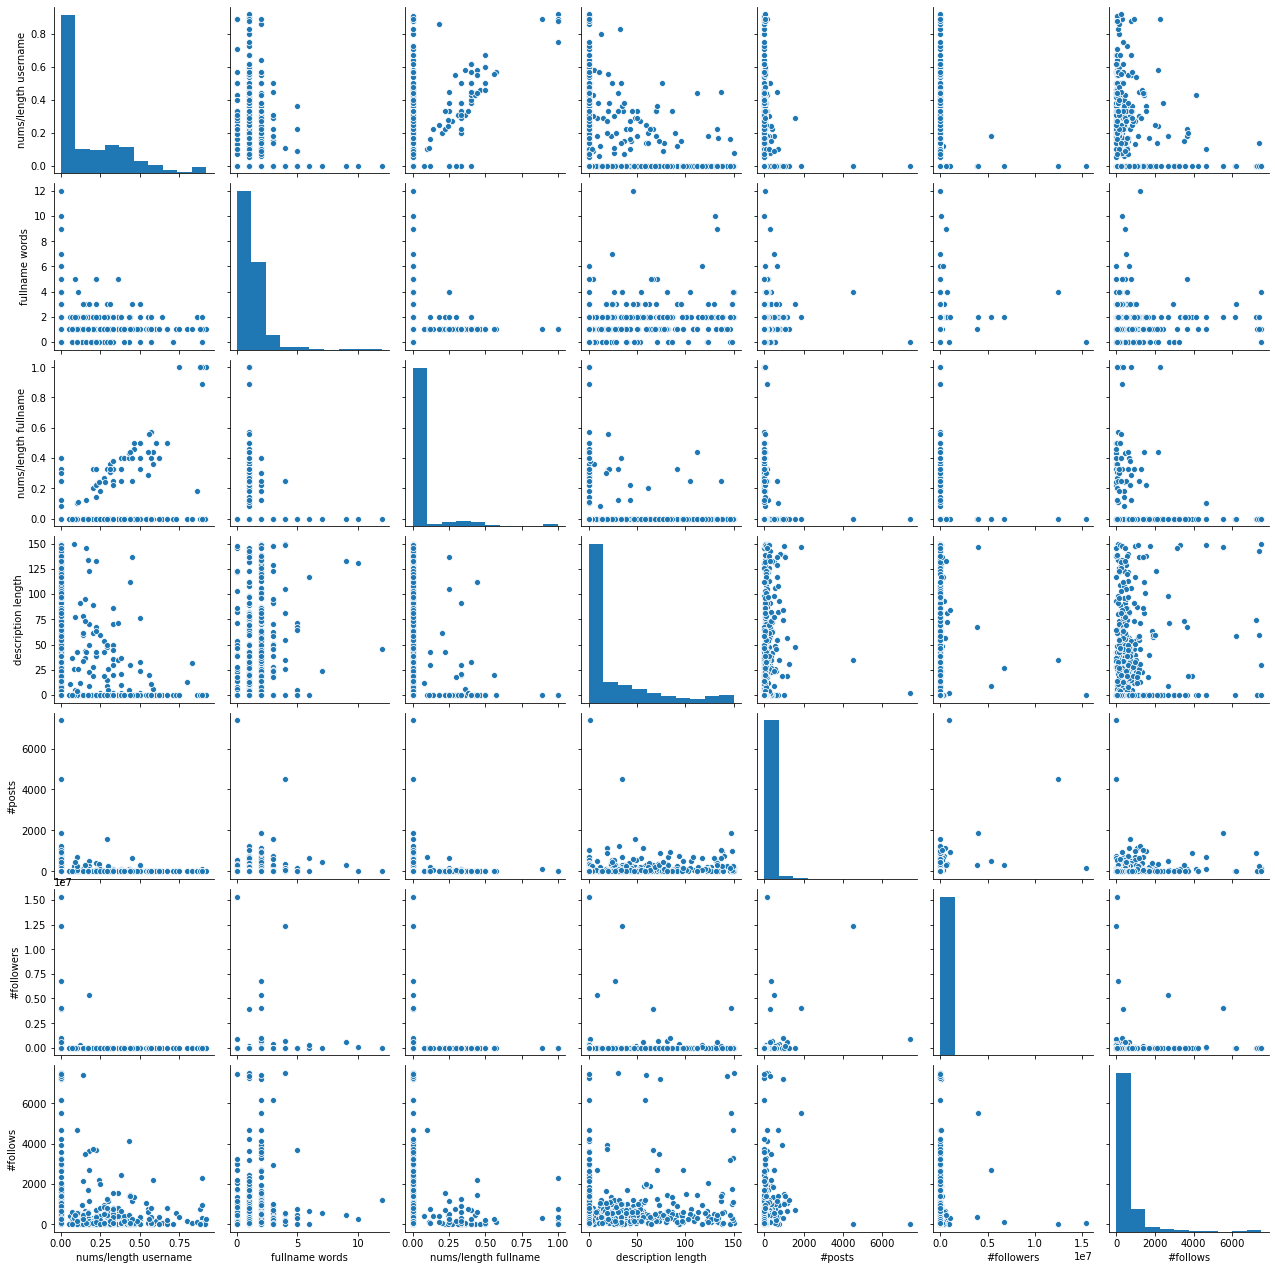

In [21]:
#pair plots
sns.pairplot(data.drop(['profile pic','name==username','private', 'external URL','fake'],axis=1))

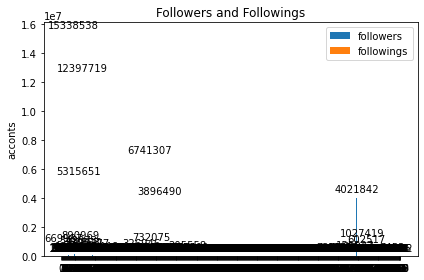

In [22]:
labels=data.index
x=  np.arange(len(labels))
width = 0.35  # the width of the bars

fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, data['#followers'], width, label='followers')
rects2 = ax.bar(x + width/2, data['#follows'], width, label='followings')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('acconts')
ax.set_title('Followers and Followings')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

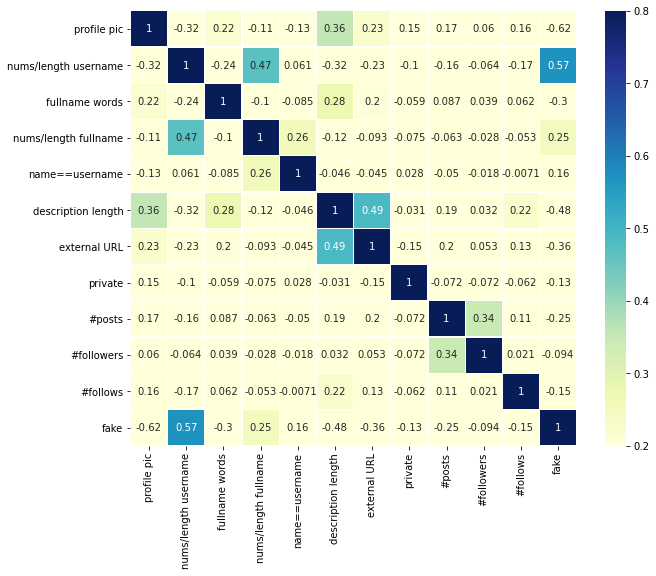

In [23]:
corrmatrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.8,annot=True,linewidth=0.2,cmap='YlGnBu')

In [24]:
x=data.drop('fake',axis=1)
y=data['fake']

In [25]:
x.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

In [27]:
#splitting dataset
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
x_train.shape

(556, 11)

In [30]:
x_test.shape

(140, 11)

## Modeling

In [31]:
#classification
#1.logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\ACER1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.8642857142857143


In [33]:
print(confusion_matrix(y_test,y_pred))

[[60 13]
 [ 6 61]]


In [34]:
#2.knn model
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [35]:
acc_values

[0.9,
 0.8857142857142857,
 0.8714285714285714,
 0.8785714285714286,
 0.8714285714285714,
 0.8714285714285714,
 0.8785714285714286,
 0.8571428571428571,
 0.8642857142857143,
 0.8571428571428571,
 0.8714285714285714,
 0.8642857142857143]

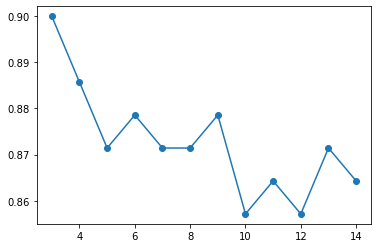

In [36]:
plt.plot(neighbors,acc_values,'-o')

In [37]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9


In [38]:
print(confusion_matrix(y_test,y_pred))

[[67  6]
 [ 8 59]]


In [39]:
#3.svm linear
from sklearn.svm import SVC
lnr=SVC(kernel='linear')
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9071428571428571


In [40]:
print(confusion_matrix(y_test,y_pred))

[[66  7]
 [ 6 61]]


In [41]:
#4.svm polynomial
poly=SVC(kernel='poly',degree=3)
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.5142857142857142


In [42]:
print(confusion_matrix(y_test,y_pred))

[[ 5 68]
 [ 0 67]]


In [43]:
#5.svm radial
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.5142857142857142


In [44]:
print(confusion_matrix(y_test,y_pred))

[[ 5 68]
 [ 0 67]]


In [45]:
#6.Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.8857142857142857


In [46]:
print(confusion_matrix(y_test,y_pred))

[[67  6]
 [10 57]]


In [47]:
#7.Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9214285714285714
[[70  3]
 [ 8 59]]


In [48]:
#8.Gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[69  4]
 [ 8 59]]


In [49]:
#Std Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [50]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.95
[[71  2]
 [ 5 62]]


In [51]:
#2.knn
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [52]:
acc_values

[0.9285714285714286,
 0.9142857142857143,
 0.9071428571428571,
 0.9071428571428571,
 0.9071428571428571,
 0.9214285714285714,
 0.9357142857142857,
 0.9285714285714286,
 0.9357142857142857,
 0.9214285714285714,
 0.9285714285714286,
 0.9142857142857143]

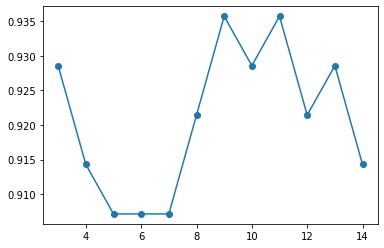

In [53]:
plt.plot(neighbors,acc_values,'-o')

In [54]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9357142857142857


In [55]:
print(confusion_matrix(y_test,y_pred))

[[69  4]
 [ 5 62]]


In [56]:
#3.svm linear
lnr=SVC(kernel='linear')
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[71  2]
 [10 57]]


In [57]:
#4.svm polynomial
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8857142857142857
[[72  1]
 [15 52]]


In [58]:
#5.svm radial
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9428571428571428
[[71  2]
 [ 6 61]]


In [59]:
#6.Decision tree
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.6071428571428571
[[19 54]
 [ 1 66]]


In [60]:
#7.Random forest
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.7285714285714285
[[36 37]
 [ 1 66]]


In [61]:
#8.Gradient boost
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.5214285714285715
[[ 6 67]
 [ 0 67]]


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
#Min Max scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler(feature_range=(0,1))
x_train=ms.fit_transform(x_train)
x_test=ms.fit_transform(x_test)

In [64]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9
[[70  3]
 [11 56]]


In [65]:
#2.knn
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [66]:
acc_values

[0.9142857142857143,
 0.9,
 0.8928571428571429,
 0.8928571428571429,
 0.8857142857142857,
 0.8928571428571429,
 0.9071428571428571,
 0.8857142857142857,
 0.8928571428571429,
 0.8857142857142857,
 0.8785714285714286,
 0.8857142857142857]

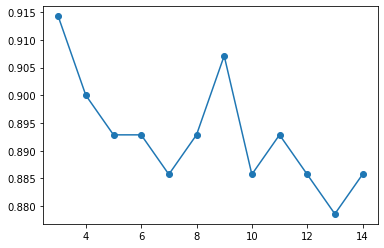

In [67]:
plt.plot(neighbors,acc_values,'-o')

In [68]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[67  6]
 [ 6 61]]


In [69]:
#3.svm linear
lnr=SVC(kernel='linear')
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9
[[70  3]
 [11 56]]


In [70]:
#4.svm polynomial
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9071428571428571
[[71  2]
 [11 56]]


In [71]:
#5.svm radial
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[71  2]
 [10 57]]


In [72]:
#6.Decision tree
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8357142857142857
[[55 18]
 [ 5 62]]


In [73]:
#7.Random forest
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9
[[65  8]
 [ 6 61]]


In [74]:
#8.Gradient boost
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8785714285714286
[[61 12]
 [ 5 62]]


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [76]:
#Normalisation scaling
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_train=norm.fit_transform(x_train)
x_test=norm.fit_transform(x_test)

In [77]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.7428571428571429
[[54 19]
 [17 50]]


In [78]:
#2.knn
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [79]:
acc_values

[0.7928571428571428,
 0.8357142857142857,
 0.8285714285714286,
 0.8357142857142857,
 0.8428571428571429,
 0.8428571428571429,
 0.8285714285714286,
 0.8285714285714286,
 0.8285714285714286,
 0.8285714285714286,
 0.8214285714285714,
 0.8142857142857143]

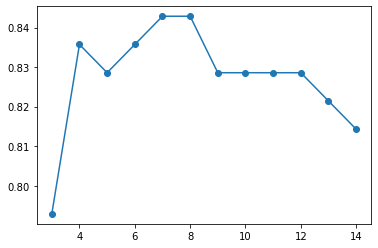

In [80]:
plt.plot(neighbors,acc_values,'-o')

In [81]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8428571428571429
[[67  6]
 [16 51]]


In [82]:
#3.svm linear
lnr=SVC(kernel='linear')
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.7785714285714286
[[60 13]
 [18 49]]


In [83]:
#4.svm polynomial
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8071428571428572
[[64  9]
 [18 49]]


In [84]:
#5.svm radial
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.7928571428571428
[[62 11]
 [18 49]]


In [85]:
#6.Decision tree
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[66  7]
 [ 5 62]]


In [86]:
#7.Random forest
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9142857142857143
[[68  5]
 [ 7 60]]


In [87]:
#8.Gradient boost
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.9357142857142857
[[69  4]
 [ 5 62]]


In [88]:
#Logistic regression after standard scaling is best classification model giving 95% accuracy
#lets check the feature importance and model again

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [90]:
#Std Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [91]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.95
[[71  2]
 [ 5 62]]


In [92]:
# Feature importance
importance = lr.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1.90110
Feature: 1, Score: 1.36445
Feature: 2, Score: -0.25577
Feature: 3, Score: 0.33093
Feature: 4, Score: 0.22290
Feature: 5, Score: -0.69856
Feature: 6, Score: -1.03694
Feature: 7, Score: -0.36033
Feature: 8, Score: -2.66808
Feature: 9, Score: -0.40051
Feature: 10, Score: 0.06765


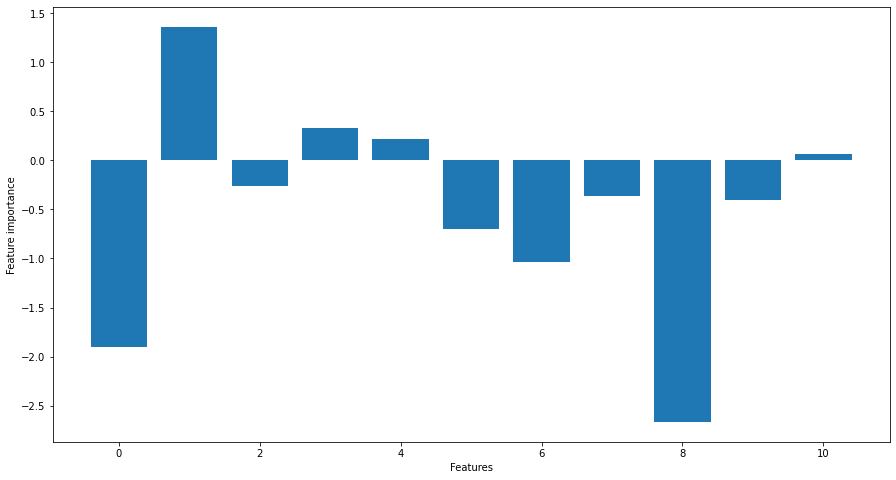

In [93]:
# plot feature importance
plt.figure(figsize=(15,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.show()

In [94]:
data.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [95]:
#Droping least important feature
data1=data.drop(['nums/length fullname'],axis=1)

In [96]:
data1.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'name==username', 'description length', 'external URL', 'private',
       '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [97]:
x=data1.drop('fake',axis=1)
y=data1['fake']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [99]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy :  0.8785714285714286
[[63 10]
 [ 7 60]]


C:\Users\ACER1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
#Std Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [101]:
#.1.Logistic
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy is not increased on dropping any features but it remains the same (95) on dropping FEATURE:'nums/length fullname'

Accuracy :  0.95
[[71  2]
 [ 5 62]]


# Logistic Regression after std scaling is best classification model for this dataset